<a href="https://colab.research.google.com/github/digital-science/dimensions-api-lab/blob/master/3-workshops/2019-04-Technical-University-of-Denmark/4-Sum-of-citations-and-citation-histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open Dimensions API Lab In Google Colab"/></a>

# Example:  Retrieve the sum of citations by year, and create a citation histogram

In [2]:
from dimcli.shortcuts import dslquery_json as dslquery
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

## Return publications
Return all articles between 2000 and 2015 for the Journal Science and Technology of Advanced Materials

First, define a function that will retrieve publications for the Journal Science and Technology of Advanced Materials.
Hint: you can get the id of the journal that you are interested in by looking at the dimensions url when filtering on source title in the application: https://app.dimensions.ai/discover/publication?and_facet_journal=jour.1048844

In [4]:
def searchPubs(limit=1000, skip=0):
    data = """search publications 
          where year in [2000:2015]
          and journal.id = "jour.1048844"
          and type="article"
          return publications[id+times_cited+year]
          limit {} skip {}
    """.format(limit,skip)
    return data

## Loop through the results as there are more than 1000

Second, define a function that get the search results in batches of 1000, by using the skip function. You can get up to 50,000 publications using this method.

In [6]:
def dslsearchpublications():
    skip = 0
    pubs = []
    total_pubs = []
    result = {}
    while (skip == 0) or (len(pubs) == 1000):
        pubs = dslquery(searchPubs(skip=skip)).get('publications',[])
        total_pubs += pubs
        skip += 1000      
                            
    return total_pubs

## Put the results into a dataframe

run your Dimensions API loop, and put the results into a dataframe

In [7]:
pubs = dslsearchpublications()
print(len(pubs))
rf = pd.DataFrame(pubs)
rf.head()

Execution time: 0.7992026805877686
Execution time: 0.5499269962310791
1542


,id,times_cited,year
0,pub.1003607635,4,2015
1,pub.1049409734,3,2015
2,pub.1005014258,11,2015
3,pub.1023733465,0,2015
4,pub.1027111384,10,2015


## Sum the citations by year

Use the dataframe to sum the results, and create a bar chart

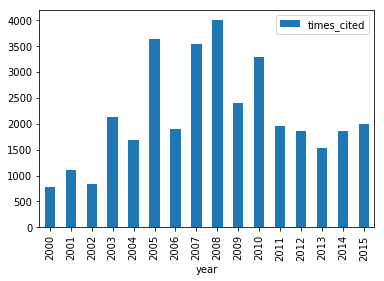

In [8]:
rf.groupby(['year']).sum().plot(kind='bar')


## Journal Citation Histogram

Taking the same dataframe, you can now easily create a citation histogram

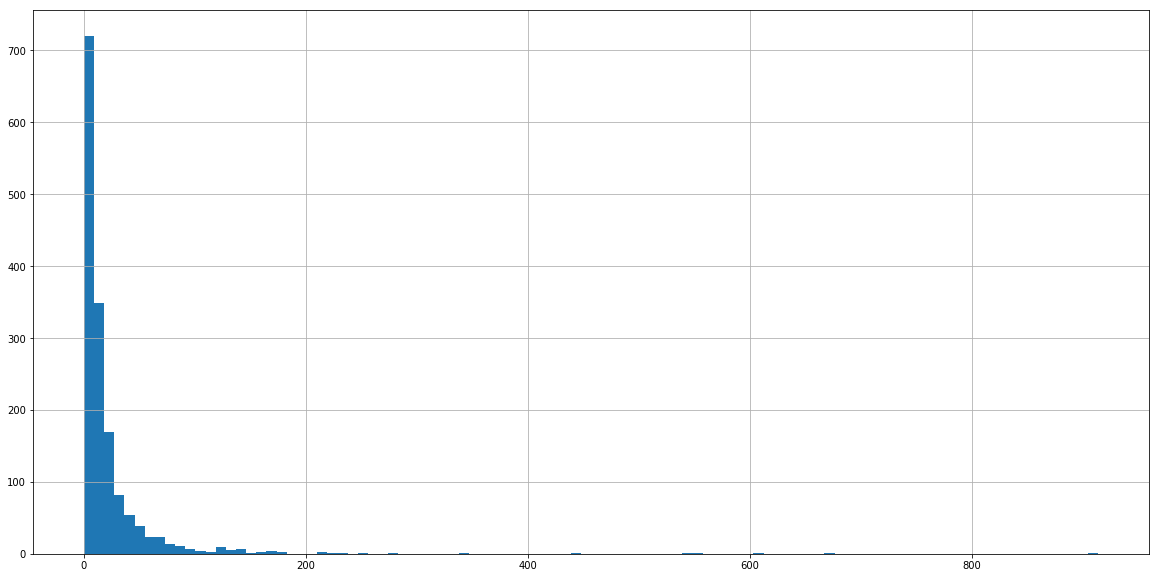

In [9]:
fig = plt.figure(figsize = (20,10))
ax = fig.gca()
rf['times_cited'].hist(bins=100)

---
# Want to learn more?

Check out the [Dimensions API Lab](https://digital-science.github.io/dimensions-api-lab/) website, which contains many tutorials and reusable Jupyter notebooks for scholarly data analytics. 